<h1 align=center style="line-height:150%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
تمرین سری ششم
</font>
</h1>

<h1 align=right style="line-height:150%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
فراخوانی کتابخانه های لازم
</font>
</h1>

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px

In [2]:
import warnings
warnings.filterwarnings("ignore")

<h1 align=right style="line-height:150%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<code>SVM</code> و <code>KNN</code>
بخش اول:بررسی مدل
های 
</font>
</h1>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<b>اهداف این بخش:</b>

<li dir=rtl style="text-align: right"> 
بررسی 
<code>HyperParameter</code>
های مدل های 
<code>SVM</code>
و
<code>KNN</code>
</li> 

<li dir=rtl style="text-align: right"> 
مدیریت داده های پرت با
<code>SVM</code>
</li> 
  
</font>
</p>

<h1 align=right style="line-height:150%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
خواندن دادگان
</font>
</h1>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
دادگانی که آدرس آن در متغیر
<code>dataset_url</code>
ذخیره شده است را با 
<code>read_csv</code>
بخوانید و دیتافریم آن را
<code>data</code>
بنامید.
  </font>
</p>

In [19]:
dataset_url = "https://raw.githubusercontent.com/Aminzein/HermesMachineLearningBootcampDatasets/main/HW5/train.csv"
#read data
data = pd.read_csv(dataset_url)

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
دیتافریم ساخته شده را با 
<code>info</code>
و
<code>describe</code>
و
<code>head</code>
بررسی کنید.
  </font>
</p>

In [20]:
#print head
data.head()

Mean of the integrated profile  \
0                      121.156250   
1                       76.968750   
2                      130.585938   
3                      156.398438   
4                       84.804688   

   Standard deviation of the integrated profile  \
0                                     48.372971   
1                                     36.175557   
2                                     53.229534   
3                                     48.865942   
4                                     36.117659   

   Excess kurtosis of the integrated profile  \
0                                   0.375485   
1                                   0.712898   
2                                   0.133408   
3                                  -0.215989   
4                                   0.825013   

   Skewness of the integrated profile  Mean of the DM-SNR curve  \
0                           -0.013165                  3.168896   
1                            3.388719                  2.399666   
2                           -0.297242                  2.743311   
3                           -0.171294                 17.471572   
4                            3.274125                  2.790134   

   Standard deviation of the DM-SNR curve  \
0                               18.399367   
1                               17.570997   
2                               22.362553   
3                                     NaN   
4                               20.618009   

   Excess kurtosis of the DM-SNR curve  Skewness of the DM-SNR curve  \
0                             7.449874                     65.159298   
1                             9.414652                    102.722975   
2                             8.508364                     74.031324   
3                             2.958066                      7.197842   
4                             8.405008                     76.291128   

   target_class  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0

In [21]:
#print descriptive statistics of df using describe
data.describe()

Mean of the integrated profile  \
count                    12528.000000   
mean                       111.041841   
std                         25.672828   
min                          5.812500   
25%                        100.871094   
50%                        115.183594   
75%                        127.109375   
max                        189.734375   

       Standard deviation of the integrated profile  \
count                                  12528.000000   
mean                                      46.521437   
std                                        6.801077   
min                                       24.772042   
25%                                       42.362222   
50%                                       46.931022   
75%                                       50.979103   
max                                       91.808628   

       Excess kurtosis of the integrated profile  \
count                               10793.000000   
mean                                    0.478548   
std                                     1.064708   
min                                    -1.738021   
25%                                     0.024652   
50%                                     0.223678   
75%                                     0.473125   
max                                     8.069522   

       Skewness of the integrated profile  Mean of the DM-SNR curve  \
count                        12528.000000              12528.000000   
mean                             1.778431                 12.674758   
std                              6.208450                 29.613230   
min                             -1.791886                  0.213211   
25%                             -0.188142                  1.910535   
50%                              0.203317                  2.792642   
75%                              0.932374                  5.413253   
max                             68.101622                222.421405   

       Standard deviation of the DM-SNR curve  \
count                            11350.000000   
mean                                26.351318   
std                                 19.610842   
min                                  7.370432   
25%                                 14.404353   
50%                                 18.412402   
75%                                 28.337418   
max                                110.642211   

       Excess kurtosis of the DM-SNR curve  Skewness of the DM-SNR curve  \
count                         12528.000000                  11903.000000   
mean                              8.333489                    105.525779   
std                               4.535783                    107.399585   
min                              -3.139270                     -1.976976   
25%                               5.803063                     35.199899   
50%                               8.451097                     83.126301   
75%                              10.727927                    139.997850   
max                              34.539844                   1191.000837   

       target_class  
count  12528.000000  
mean       0.092034  
std        0.289085  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

In [22]:
#print a concise summary of df using info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Mean of the integrated profile                12528 non-null  float64
 1   Standard deviation of the integrated profile  12528 non-null  float64
 2   Excess kurtosis of the integrated profile     10793 non-null  float64
 3   Skewness of the integrated profile            12528 non-null  float64
 4   Mean of the DM-SNR curve                      12528 non-null  float64
 5   Standard deviation of the DM-SNR curve        11350 non-null  float64
 6   Excess kurtosis of the DM-SNR curve           12528 non-null  float64
 7   Skewness of the DM-SNR curve                  11903 non-null  float64
 8   target_class                                  12528 non-null  float64
dtypes: float64(9)
memory usage: 881.0 KB


<h1 align=right style="line-height:150%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
معرفی دادگان
</font>
</h1>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<code>Pulsars</code>
 نوع کمیاب از ستاره های نوترونی هستند که انتشارات رادیویی قابل تشخیص از زمین تولید می کنند. آنها به عنوان کاوشگر فضا-زمان، محیط بین ستاره ای و حالت های ماده از اهمیت علمی قابل توجهی برخوردار هستند. اکنون از ابزارهای یادگیری ماشین برای برچسب زدن 
 <code>Pulsars</code>
استفاده می شود تا تجزیه و تحلیل سریع به صورت خودکار تسهیل شود.
برای اطلاعات بیشتر به
<a href="https://www.kaggle.com/datasets/colearninglounge/predicting-pulsar-starintermediate?select=pulsar_data_train.csv"> لینک</a>
مراجعه کنید. 
  </font>
</p>

<p style="text-align:center"><img  src="https://i.postimg.cc/43Yb9FH4/dataset-cover-2.jpg" width="1400" height="400" alt="dataset cover"></p>


<h1 align=right style="line-height:150%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
پیش پردازش دادگان
</font>
</h1>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در اولین گام پیش پردازش اسم ستون های دادگان را تغییر میدهیم و آن ها را خلاصه میکنیم.
دیکشنری
<code>data_new_column_names</code>
را طوری تغییر دهید که اسم ستون به شکل زیر عوض شود.
  </font>
</p>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>

<li style="text-align: left"> 
<code>"Mean of the integrated profile"</code>  : <code>'IP Mean'</code> 
</li>
<li style="text-align: left"> 
<code>"Standard deviation of the integrated profile"</code> : <code>'IP Std'</code>
</li>
<li style="text-align: left"> 
<code>"Excess kurtosis of the integrated profile"</code> : <code>"IP Kurtosis"</code>
</li>
<li style="text-align: left"> 
<code>"Skewness of the integrated profile"</code> : <code>'IP Skewness'</code>
</li>
<li style="text-align: left"> 
<code>""Mean of the DM-SNR curve":'DM-SNR Mean'"</code> : <code>'DM-SNR Mean'</code>
</li>
<li style="text-align: left"> 
<code>"Standard deviation of the DM-SNR curve"</code> : <code>'DM-SNR Std'</code>
</li>
<li style="text-align: left"> 
<code>"Excess kurtosis of the DM-SNR curve"</code> : <code>'DM-SNR Kurtosis'</code>
</li>
<li style="text-align: left"> 
<code>"Skewness of the DM-SNR curve"</code> : <code>'DM-SNR Skewness'</code>
</li>
</font>
</p>

In [23]:
data_column_names ={
"Mean of the integrated profile" : 'IP Mean' ,
"Standard deviation of the integrated profile" : 'IP Std',
"Excess kurtosis of the integrated profile": 'IP Kurtosis',
"Skewness of the integrated profile" : 'IP Skewness',
"Mean of the DM-SNR curve": 'DM-SNR Mean',
"Standard deviation of the DM-SNR curve" : 'DM-SNR Std',
"Excess kurtosis of the DM-SNR curve" : 'DM-SNR Kurtosis',
"Skewness of the DM-SNR curve" : 'DM-SNR Skewness'
} 

In [24]:
#rename dataset columns using data_column_names
data.rename(data_column_names, axis = 1, inplace = True)

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
برای اطمینان از تغییر نام ستون ها پنج سطر اول دیتافریم را چاپ میکنیم.
  </font>
</p>

In [25]:
#print head again
data.head()

IP Mean     IP Std  IP Kurtosis  IP Skewness  DM-SNR Mean  DM-SNR Std  \
0  121.156250  48.372971     0.375485    -0.013165     3.168896   18.399367   
1   76.968750  36.175557     0.712898     3.388719     2.399666   17.570997   
2  130.585938  53.229534     0.133408    -0.297242     2.743311   22.362553   
3  156.398438  48.865942    -0.215989    -0.171294    17.471572         NaN   
4   84.804688  36.117659     0.825013     3.274125     2.790134   20.618009   

   DM-SNR Kurtosis  DM-SNR Skewness  target_class  
0         7.449874        65.159298           0.0  
1         9.414652       102.722975           0.0  
2         8.508364        74.031324           0.0  
3         2.958066         7.197842           0.0  
4         8.405008        76.291128           0.0

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
حالا تعداد دادگان گمشده در هر ستون را پیدا میکنیم.
  </font>
</p>

In [26]:
#count null values
data.isnull().sum()

IP Mean               0
IP Std                0
IP Kurtosis        1735
IP Skewness           0
DM-SNR Mean           0
DM-SNR Std         1178
DM-SNR Kurtosis       0
DM-SNR Skewness     625
target_class          0
dtype: int64

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
ستون هایی که مقدار گمشده دارند را با مقادیر مناسب پر کنید.
  </font>
</p>

In [27]:
# fill null values
data.fillna(data.mean(), inplace=True)

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
حال دوباره
<code>describe</code>
را فراخوانی میکنیم و با نتایج قبلی مقایسه میکنیم.
  </font>
</p>

In [28]:
data.describe()

IP Mean        IP Std   IP Kurtosis   IP Skewness   DM-SNR Mean  \
count  12528.000000  12528.000000  12528.000000  12528.000000  12528.000000   
mean     111.041841     46.521437      0.478548      1.778431     12.674758   
std       25.672828      6.801077      0.988230      6.208450     29.613230   
min        5.812500     24.772042     -1.738021     -1.791886      0.213211   
25%      100.871094     42.362222      0.057820     -0.188142      1.910535   
50%      115.183594     46.931022      0.289934      0.203317      2.792642   
75%      127.109375     50.979103      0.478548      0.932374      5.413253   
max      189.734375     91.808628      8.069522     68.101622    222.421405   

         DM-SNR Std  DM-SNR Kurtosis  DM-SNR Skewness  target_class  
count  12528.000000     12528.000000     12528.000000  12528.000000  
mean      26.351318         8.333489       105.525779      0.092034  
std       18.666010         4.535783       104.686104      0.289085  
min        7.370432        -3.139270        -1.976976      0.000000  
25%       14.761144         5.803063        38.128424      0.000000  
50%       19.617161         8.451097        87.795533      0.000000  
75%       26.473142        10.727927       135.774973      0.000000  
max      110.642211        34.539844      1191.000837      1.000000

<h1 align=right style="line-height:150%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
تحلیل دادگان
</font>
</h1>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
نمودار جعبه ای  سه ستون
<code>IP Mean</code>
و
<code>DM-SNR Mean</code>
و
<code>IP Std</code>
را رسم کنید.
  </font>
</p>

In [29]:
# box plot of IP Mean column
px.box(data['IP Mean'])

In [30]:
# box plot of IP Kurtosis column
px.box(data['IP Kurtosis'])

In [31]:
# box plot of IP Std column
px.box(data['IP Std'])

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
با توجه به نمودار های فوق به نظر شما دادگان شامل داده
های
<code>outlier</code>
یا پرت است؟
چرا؟
  </font>
</p>

<hr>
<p dir=rtl style="direction: rtl;text-align: center;line-height:220%;font-family:vazir;font-size:medium">
<font face="vazir" size=4>
بله شامل داده پرت است زیرا همانطور که در نمودارها
قابل رویت است نقاطی وجود دارد که خارج از مرزهای بالا و پایین هم وجود دارند.
</font>
</p>
<hr>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در مدل
<code>SVM</code>
داده های پرت را چگونه میتوانیم
<code>handle</code>
کنیم؟
</font>
</p>

<hr>
<p dir=rtl style="direction: rtl;text-align: center;line-height:220%;font-family:vazir;font-size:medium">
<font face="vazir" size=4>
به کمک 
oneclasssvm
که یک نمونه آن را روی ستون 
IP Kurtusis
در ادامه پیاده کرده ایم.
</font>
</p>
<hr>

In [32]:
#Answer
from sklearn.svm import OneClassSVM
df = data
ee = OneClassSVM(nu=0.12)
yhat = ee.fit_predict(data)
mask = yhat != -1

In [33]:
y = ee.fit_predict(data['IP Kurtosis'].values.reshape(-1, 1))
px.box(data['IP Kurtosis'][y != -1], points='all')

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
با استفاده از
<code>scatter_matrix</code>
در پلاتلی
نمودار های پراکندگی ستون های
<code>IP Mean , IP Std , IP Kurtosis , IP Skewness</code>
را رسم کنید.
</font>
</p>

In [34]:
#scatter matrix
px.scatter_matrix(data,
            dimensions=["IP Mean" , 'IP Std', 'IP Kurtosis', 'IP Skewness'], color="target_class")

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
حالا همین نمودار را برای چهار ستون
<code>DM-SNR Mean,DM-SNR Std,DM-SNR Kurtosis,DM-SNR Skewness</code>
رسم کنید.اندازه نمودار را با 
پارامتر های
<code>width</code>
و
<code>height</code>
تنظیم کنید.
</font>
</p>

In [35]:
#scatter matrix
px.scatter_matrix(data ,
    dimensions=["DM-SNR Mean", 'DM-SNR Std', 'DM-SNR Kurtosis', 'DM-SNR Skewness'],
    color='target_class', width=1000 , height=700)

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
نمودار چگالی یا 
<code>Histogram</code>
ستون
<code>IP Mean</code>
را با توجه به دسته بندی موجود در
<code>target_class</code>
رسم کنید.
  </font>
</p>

In [36]:
#histogram of IP Mean
px.histogram(data, 'IP Mean', color='target_class')

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
نمودار چگالی یا 
<code>Histogram</code>
ستون
<code>DM-SNR Kurtosis</code>
را با توجه به دسته بندی موجود در
<code>target_class</code>
رسم کنید.
  </font>
</p>

In [37]:
#histogram of IP Mean
px.histogram(data, 'DM-SNR Kurtosis', color = 'target_class')

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در ادامه ماتریس همبستگی را برای دادگان رسم کنید.
</font>
</p>

In [38]:
# plot correlation heatmap
px.imshow(data.corr())

<h1 align=right style="line-height:150%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مدل سازی
</font>
</h1>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
همانطور که گفتیم میخواهیم ستون 
<code>target_class</code>
را پیش بینی کنیم.داده ها را به دو قسمت
<code>X</code>
و
<code>y</code>
تقسیم کنید که در آن
<code>X</code>
ویژگی های موجود و 
<code>y</code>
ستون هدف باشد.
</font>
</p>

In [39]:
X = data.drop('target_class' , axis=1)
y = data['target_class']

<h1 align=right style="line-height:150%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc" size=5>
مقیاس بندی ویژگی ها
</font>
</h1>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
با استفاده از 
<code>Standard Scaler </code>
داده ها را مقیاس بندی کنید.
</font>
</p>

In [40]:
from sklearn.preprocessing import StandardScaler
# scale X
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

<h1 align=right style="line-height:150%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc" size=5>
جدا سازی داده های آموزش و آزمون
</font>
</h1>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
حال با استفاده از 
<code>train_test_split</code>
داده ها را به دو قسمت آموزش و آزمون تقسیم میکنیم به طوری که
داده های آزمون
<coed>20%</code>
کل داده ها باشد.
نتایجی که میبینید برای 
<code>random_state=42</code>
هستند اگر مقدار آن  عدد دیگری باشد ممکن است خروجی ها فرق کنند.
</font>
</p>

In [41]:
from sklearn.model_selection import train_test_split
#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

array([[-1.47157088e-02,  5.44645129e-03, -3.93221907e-16, ...,
        -3.58658840e-01, -6.50882778e-02,  1.35752706e-15],
       [ 6.61792581e-01, -9.37194147e-01, -3.93221907e-16, ...,
        -1.46313033e-01, -5.51751213e-01, -6.48432896e-01],
       [ 5.23630294e-01,  7.46441216e-02, -4.12691532e-01, ...,
        -6.23331000e-01,  1.02249426e+00,  7.47955529e-01],
       ...,
       [-3.90091043e+00, -1.66839990e+00,  5.15116001e+00, ...,
         1.56125349e+00, -1.60997936e+00, -9.98178960e-01],
       [-2.04917095e-01,  2.24799705e-01, -3.93221907e-16, ...,
        -2.94152671e-01, -2.36441881e-01, -4.28590979e-01],
       [ 4.91980784e-01, -4.85869729e-01, -8.95493077e-01, ...,
        -2.28405888e-15, -8.67289776e-01, -8.27422241e-01]])

<h1 align=right style="line-height:150%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc" size=5>
<code>KNN</code>
مدل
</font>
</h1>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
مدل 
<code>KNeighborsClassifier</code>
را از 
<code>sklearn.neighbors</code>
به محیط کاری خود اضافه کنید و سپس 
با 
<code>cross validation</code>
عملکرد مدل را ارزیابی کنید.
</font>
</p>

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn_default = KNeighborsClassifier()

In [43]:
from sklearn.model_selection import cross_val_score
cross_scores = cross_val_score(knn_default, X_train, y_train ,cv=5)
print("KNN Cross validation score : " , cross_scores.mean())

KNN Cross validation score :  0.9761524830637975


<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
حالا روی داده های آموزشی 
<code>fit</code>
کرده و روی داده های آزمون ارزیابی کنید.
</font>
</p>

In [28]:
#fit train data
knn_default.fit(X_train, y_train)
#predict X_test
default_knn_y_pred = knn_default.predict(X_test)

In [29]:
from sklearn.metrics import classification_report
print(classification_report(default_knn_y_pred, y_test))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      2307
         1.0       0.83      0.95      0.89       199

    accuracy                           0.98      2506
   macro avg       0.91      0.97      0.94      2506
weighted avg       0.98      0.98      0.98      2506



<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در ادامه تاثیر
<code>K</code>
روی علکرد الگوریتم را
با رسم
<code>validation curve</code>
 بررسی میکنیم.
</font>
</p>

In [30]:
from sklearn.model_selection import validation_curve
k_range = list(range(1 , 18 , 2))

train_scores, test_scores = validation_curve(estimator = KNeighborsClassifier(),
                                           X= X_train,
                                           y= y_train,
                                           param_name='n_neighbors',
                                           param_range=k_range,
                                           cv=5)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

In [31]:
from unicodedata import name

fig = px.line(x=k_range, y=train_mean)
fig.add_scatter(x=k_range, y=test_mean , name = "test scores")

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
با توجه به نمودار بالا
کدام مقدار برای
<code>k</code>
مناسب است؟
چرا؟
</font>
</p>

<hr>
<p dir=rtl style="direction: rtl;text-align: center;line-height:220%;font-family:vazir;font-size:medium">
<font face="vazir" size=4>
به نظر می رسد که   مقدار 13  برای 
<code>k</code>
مناسب باشد زیرا اختلاف امتیاز بین دیتای آموزش و تست حداقل است و 
همینطور مقدار پارامتر با توجه به اندازه نمونه چندان زیاد نیست که احتمال
آندر فیت شدن پیش بیاید.

</font>
</p>
<hr>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
اگر مقدار
<code>k</code>
خیلی کم باشد مدل
<code>underfit</code>
میکند یا 
<code>overfit</code>
؟
چرا؟
</font>
</p>

<hr>
<p dir=rtl style="direction: rtl;text-align: center;line-height:220%;font-family:vazir;font-size:medium">
<font face="vazir" size=4>
احتمال
<code>overfit</code>
شدن بیشتر می شود زیرا مدل برحسب تعداد همسایه های کمتر 
برچسب گذاری می کند و این می تواندواریانس پیش بینی ها رو با تغییر
اندک در نقطه مورد نظر بسیار بالا ببرد.
از روی نمودار بالا هم مشخص هست که در مقادیر پایین تر این پارامتر، داده آموزش عملکرد خیلی بالاتری
نسبت به تست دارد.
</font>
</p>
<hr>

<h1 align=right style="line-height:150%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc" size=5>
<code>SVM</code>
مدل
</font>
</h1>

<h1 align=right style="line-height:150%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc" size=5>
اجرای 
الگوریتم
با پارامتر های پیش فرض
</font>
</h1>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
مدل
<code>svc</code>
را از
<code>sklearn.svm</code>
به محیط کاری خود اضافه کنید.
</font>
</p>

In [14]:
from sklearn.svm import SVC

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
حالا مثل مدل
<code>KNN</code>
با پارامتر های پیش فرض 
مدل
<code>SVM</code>
ارزیابی
متقابل 
میکنیم.
</font>
</p>

In [15]:
svc = SVC()
cross_scores = cross_val_score(svc, X_train, y_train, cv = 5)
print("SVM Cross validation score : " , np.mean(cross_scores))

NameError: name 'cross_val_score' is not defined

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در ادامه مدل 
<code>SVM</code>
را روی داده های آموزشی
<code>fit</code>
کرده و روی داده های آزمون سنجش میکنیم.
</font>
</p>

In [34]:
# fit train data
svc.fit(X_train, y_train)
#predict test data
default_y_pred = svc.predict(X_test)

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
ماتریس در هم ریختگی را برای 
<code>SVM</code>
رسم کنید.
</font>
</p>

In [35]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(default_y_pred, y_test)
px.imshow(conf_mat , text_auto=True)

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
حالا در ادامه معیار های دسته بندی را محاسبه میکنیم.
</font>
</p>

In [36]:
#classification report
print(classification_report(default_y_pred, y_test))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      2316
         1.0       0.81      0.96      0.88       190

    accuracy                           0.98      2506
   macro avg       0.90      0.97      0.93      2506
weighted avg       0.98      0.98      0.98      2506



<h1 align=right style="line-height:150%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc" size=5>
<code>HyperParameters</code>
بهینه کردن
</font>
</h1>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در بخش تحلیل دادگان مشاهده کردیم که دادگان شامل داده های دور افتاده است به همین دلیل در ادامه مقدار
<code>C</code>
را بیشتر کرده و عملکرد آن را اندازه میگیریم.
برای اینکار از
<code>validation_curve</code>
استفاده کنید.
</font>
</p>

In [37]:
C_range = np.arange(1,500 , 50)

train_scores, test_scores = validation_curve(SVC(),
                                           X= X_train,
                                           y= y_train,
                                           param_name='C',
                                           param_range=C_range,
                                           cv=5)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

In [38]:
fig = px.line(x=C_range, y=train_mean)
fig.add_scatter(x=C_range, y=test_mean , name = "test scores")

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
با توجه به نمودار به دست آمده کدام مقدار برای
<code>C</code>
مناسب است؟
</font>
</p>

<hr>
<p dir=rtl style="direction: rtl;text-align: center;line-height:220%;font-family:vazir;font-size:medium">
<font face="vazir" size=4>
با توجه به نمودار برای 
<code>c</code>
مقادیر ۱ یا ۵۱ مناسب است ولی هر چقدر مقدار 
<code>c</code>
بالاتر می رود، به دلیل فاصله گرفتن امتیاز آموزش از تست، احتمال
<code>overfit</code>
شدن در حال افزایش است.
</font>
</p>
<hr>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
مقدار پیش فرض 
<code>kernel</code>
برابر با
<code>rbf</code>
است.در ادامه 
<code>kernel</code>
های گوناگون را
با پارامتر های پیش فرض 
 ارزیابی میکنیم.
برای اینکار روی مقادیر 
<code>kernel</code>
ها حرکت کرده و در هر گام با 
<code>cross_val_score</code>
امتیاز های مدل ها را دریافت میکنیم و میانگین و انحراف معیار آن ها را چاپ میکنیم.
همچنین با ذخیره در
دیکشنری
<code>cv_scores</code>
نمودار جعبه ای آن ها را رسم میکنیم.
</font>
</p>

In [39]:
cv_scores = {}
kernels = ["linear" , "rbf" , "poly"]
for kernel in kernels:
    estimator = SVC(kernel=kernel) 
    cross_scores = cross_val_score(estimator, X_train, y_train, cv = 5)
    # calculate mean and std of scores
    print(f"kernel = {kernel} Mean = {cross_scores.mean()} Std = {cross_scores.std()}")
    cv_scores[str(kernel)] = cross_scores

kernel = linear Mean = 0.9755542779777105 Std = 0.002538976551434406
kernel = rbf Mean = 0.9769508862574104 Std = 0.0025695303918414495
kernel = poly Mean = 0.9736580206171197 Std = 0.002608610173759403


<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
حالا با استفاده از دیکشنری
<code>cv_scores</code>
نمودار جعبه ای امتیاز های 
<code>kernel</code>
های گوناگون را مقایسه میکنیم.
</font>
</p>

In [40]:
#convert cv_scores to dataframe
cv_scores_df = pd.DataFrame(cv_scores)
#Create box plot of cv_scores_df
kernel_box = px.box(cv_scores_df)
# show the plot
kernel_box.show()

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
برای انتخاب پارامتر های بهینه لیستی از دیکشنری ها به نام
<code>params</code>
میسازیم به طوری که هر دیکشنری یک 
<code>kernel</code>
و مجموعه پارامتر های مرتبط با آن 
<code>kernel</code>
را شامل میشود.
</font>
</p>

In [41]:
params = [
  {'C': [10 , 50 , 100], 'kernel': ['linear']},
  {'C': [10 , 50 , 100] , 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
  {'C': [10 , 50 , 100], 'degree': [2, 5 ], 'kernel': ['poly']}
 ]

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
با استفاده از 
<code>params</code>
و 
<code>Random Search</code>
بهترین پارامتر ها را پیدا کنید.
</font>
</p>

In [42]:
from sklearn.model_selection import RandomizedSearchCV
svc_random = RandomizedSearchCV(estimator= SVC(probability=True), 
                           param_distributions=params, 
                           cv=5, scoring = "accuracy", n_jobs=-1)

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<b>توجه:</b>
برای اینکه بتوانیم از مدل 
<code>SVM</code>
احتمال برچسب های یک نمونه را دریافت کنیم لازم است هنگام تعریف مدل
<code>probability = True</code>
قرار دهیم.
</font>
</p>

In [43]:
#fit svc_random to train data
svc_random.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=-1,
                   param_distributions=[{'C': [10, 50, 100],
                                         'kernel': ['linear']},
                                        {'C': [10, 50, 100],
                                         'gamma': [0.001, 0.0001],
                                         'kernel': ['rbf']},
                                        {'C': [10, 50, 100], 'degree': [2, 5],
                                         'kernel': ['poly']}],
                   scoring='accuracy')

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
اگر اجرای سلول فوق خیلی زمان بر شد تعداد پارامتر های
<code>params</code>
را کمتر کرده و دوباره اجرا کنید.
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
حالا بهترین پارامتر ها را چاپ میکنیم.
</font>
</p>

In [44]:
#best params
svc_random.best_params_

{'kernel': 'rbf', 'gamma': 0.001, 'C': 100}

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
با استفاده از بهترین مدل یافته شده داده های آزمون را پیش بینی کنید.
</font>
</p>

In [45]:
#predict test data with best_estimator_
best_svc = svc_random.best_estimator_
best_y_pred = best_svc.predict(X_test)

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
حالا میتوانیم معیار های دسته بندی را محاسبه کنیم.
</font>
</p>

In [46]:
print(classification_report(best_y_pred, y_test))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      2320
         1.0       0.79      0.97      0.87       186

    accuracy                           0.98      2506
   macro avg       0.90      0.97      0.93      2506
weighted avg       0.98      0.98      0.98      2506



<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
همانطور که میدانید یکی از معیار های ارزیابی دسته بند ها نمودار
<code>ROC</code>
است.
برای رسم آن در 
<code>Plotly</code>
ابتدا
<code>roc_curve</code>
و
<code>auc</code>
را از
<code>sklearn.metrics</code>
به محیط خود اضافه کنید.
</font>
</p>

In [47]:
from sklearn.metrics import roc_curve, auc

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
حالا با استفاده از تابع
<code>predict_proba</code>
احتمال هر کدام از برچسب ها را برای داده های آزمون محاسبه کنید.
</font>
</p>

In [48]:
#get probabilities with predict_proba
best_svm_proba = best_svc.predict_proba(X_test)

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
تابع
<code>roc_curve</code>
دو ورودی میگیرد.اولی
<code>y_test</code>
و دومی نیز احتمال یک بودن برچسب  داده های آزمون است.
(ستون دوم آرایه 
<code>best_svm_proba</code>)
در خروجی نیز 
<code>True Positive Rate</code>
و
<code>False Positive Rate</code>
و
<code>threshold</code>
را برمیگرداند.
</font>
</p>

In [49]:
fpr , tpr , thresholds = roc_curve(y_test , best_svm_proba[:, 1])

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
حالا برای رسم نمودار از
<code>px.area</code>
استفاده میکنیم.محور 
<code>x</code>
را برابر با
<code>fpr</code>
و
محور
<code>y</code>
را 
<code>tpr</code>
قرار دهید.
</font>
</p>

In [50]:
fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
    )

fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.show()

<p style="text-align:center"><img  src="https://i.postimg.cc/VLjwWSsp/pca.png" width="1000"  alt="dataset cover"></p>


<h1 align=right style="line-height:150%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<code>PCA</code>
بخش دوم : آشنایی با
</font>
</h1>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<b>اهداف این بخش:</b>

<li dir=rtl style="text-align: right"> 
مصور سازی داده ها با 
<code>PCA</code>
</li> 
<li dir=rtl style="text-align: right"> 
محاسبه میزان واریانس توضیح داده شده توسط مولفه ها
</li>
<li dir=rtl style="text-align: right"> 
بررسی ضرایب مولفه های اصلی
</li>
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
همانطور که میدانید
<code>PCA</code>
تکنیکی است که با استفاده از آن میتوان داده ها با ابعاد بالا را به ابعاد پایین تر تبدیل کرد به طوری که تا حد امکان اطلاعات حفظ شود
.با این کار علاوه بر امکان مصور سازی داده ها میتوانیم سرعت اجرای الگوریتم ها را نیز بیشتر کنیم.
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
برای شروع کار با 
<code>PCA</code>
آن را از
<code>sklearn.decomposition</code>
اضافه کنید.
</font>
</p>

In [55]:
from sklearn.decomposition import PCA

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
حالا در ادامه
<code>PCA</code>
را با
<code>n_components = 3</code>
فراخوانی میکنیم.
</font>
</p>

In [52]:
pca_3 = PCA(n_components=3)

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
حالا با استفاده از
<code>pca_3</code>
دادگان بخش اول را سه بعدی میکنیم.اینکار مشابه مقیاس بندی است.ابتدا 
<code>pca_3</code>
روی داده ها
<code>fit</code>
میشود و سپس
<code>transform</code>
</font>
</p>

In [53]:
#fit pca to data
pca_3.fit(X)
#transform data
principal_components = pca_3.transform(X)

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
حالا سه مولفه اصلی به دست آمده را دیتافریم میکنیم.
ستون اول را
<code>pc1</code>
و
ستون دوم
را 
<code>pc_2</code>
و ستون سوم را نیز
<code>pc_3</code>
بنامید.
</font>
</p>

In [54]:
principal_df = pd.DataFrame(data = principal_components ,columns = ['pc1', 'pc2' , 'pc3'])

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
ستون 
<code>target_class</code>
را نیز به دیتافریم
<code>principal_df</code>
اضافه کنید.
</font>
</p>

In [55]:
principal_3 = pd.concat([principal_df  , data['target_class']] , axis = 1)

In [56]:
principal_3

pc1       pc2       pc3  target_class
0     -0.451858 -0.403830 -0.491359           0.0
1      0.631153  1.615669 -0.863760           0.0
2     -0.893842 -0.870315 -0.058002           0.0
3     -0.353964 -2.011283 -0.732055           0.0
4      0.784426  1.292392 -1.019003           0.0
...         ...       ...       ...           ...
12523 -0.211507 -1.551852 -0.430961           0.0
12524  0.054477 -0.693369 -0.711424           0.0
12525 -1.713359  2.059980  1.059942           0.0
12526 -0.827014 -0.939862 -0.403923           0.0
12527 -2.253285  1.535455  1.611497           0.0

[12528 rows x 4 columns]

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
حالا میتوانیم داده ها را به صورت سه بعدی در یک
<code>scatter plot</code>
رسم کنیم.
</font>
</p>

In [57]:
px.scatter_3d(principal_3, x='pc1' , y='pc2' , z='pc3' , opacity=0.8 , color="target_class")

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در ادامه با استفاده از
<code>scatter matrix</code>
نمودار پراکندگی مولفه های اصلی را نسبت به همدیگر رسم میکنیم.
</font>
</p>

In [58]:
px.scatter_matrix(principal_3 ,
            dimensions=["pc1" , 'pc2' , 'pc3']
            , color='target_class' , width=1000 , height=500)

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
با توجه به نمودار فوق کدام مولفه ها بین داده ها تمایزی نشان میدهند؟
</font>
</p>

<hr>
<p dir=rtl style="direction: rtl;text-align: center;line-height:220%;font-family:vazir;font-size:medium">
<font face="vazir" size=4>
مولفه
<code>pc1</code>
بین داده ها به خوبی تمایز نشان می دهد به صورتی که روی 
<code>pc>~3.5</code>
تعداد برجسب های کلاس یک کاملا بیشتر است و برعکس.
این موضوع تا حدی برای 
<code>pc2</code>
هم صادق است اما شدت تمایز آن کمتر است نسبتا.
</p>
<hr>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
ماتریس همبستگی را برای 
<code>principal_3</code>
رسم کنید.
</font>
</p>

In [59]:
# corralation matrix
px.imshow(principal_3.corr())

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
ماتریس همبستگی فوق را بررسی کنید.چه نتایجی میگیرید؟
</font>
</p>

<hr>
<p dir=rtl style="direction: rtl;text-align: center;line-height:220%;font-family:vazir;font-size:medium">
<font face="vazir" size=4>
همسبتگی ستون هدف یعنی
<code>target class</code>
با سایر مولفه ها پخش شده است به صورتی که بخش عمده همبستگی
با مولفه اول است و سهم همبستگی مولفه دوم بسیار کمتر می شود و مولفه سوم
نیز همبستگی خیلی کمی با ان ستون دارد.
</p>
<hr>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
با استفاده از ویژگی
<code>explained_variance_ratio_</code>
در
<code>pca_3</code>
میتوانیم نسبتی از واریانس که توسط هر کدام از مولفه های اصلی توضیح داده میشود را مشاهده کنیم.نمودار میله ای را برای نسبت واریانس های توضیح داده شده رسم کنید.
</font>
</p>

In [60]:
px.bar(x = ["pc1" , 'pc2' , 'pc3'] , y=pca_3.explained_variance_ratio_)

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در مجموع چند درصد از واریانس داده ها با این سه مولفه توضیح داده میشوند؟
</font>
</p>

In [61]:
print('Total explained variance ratio: {: .2%} '.format(np.sum(pca_3.explained_variance_ratio_)))

Total explained variance ratio:  86.53% 


<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
برای بررسی واریانس توضیح داده شده برای تعداد مولفه های بیشتر  دوباره
<code>PCA</code>
را فراخوانی کرده و روی داده ها
<code>fit</code>
میکنیم.
</font>
</p>

In [62]:
pca = PCA()
#fit pca on data
pca.fit(X)

PCA()

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
برای محاسبه مجموع واریانس های توضیح داده شده با 
<code>i (1<=i<=8)</code>
مولفه از تابع
<code>np.cumsum</code>
استفاده میکنیم.
به مثال زیر توجه کنید.
</font>
</p>

<p style="text-align:center"><img  src="https://i.postimg.cc/d3JRMFL8/bandicam-2022-08-09-12-42-06-588.jpg" width="1000"  alt="dataset cover"></p>


<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
واریانس های توضیح داده شده توسط هر مولفه را چاپ کنید.
</font>
</p>

In [64]:
pca.explained_variance_ratio_

array([0.50186493, 0.26191827, 0.10150152, 0.05898813, 0.03286523,
       0.02538513, 0.01290093, 0.00457587])

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
حالا در ادامه
<code>cumulative sum</code>
واریانس ها را محاسبه میکنیم.
</font>
</p>

In [65]:
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)
exp_var_cumul

array([0.50186493, 0.7637832 , 0.86528472, 0.92427285, 0.95713808,
       0.9825232 , 0.99542413, 1.        ])

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
الان میتوانیم نموداری برای مجموع واریانس های توضیح داده شده رسم کنیم.محور
<code>x</code>
را تعداد مولفه ها قرار داده و محور
<code>y</code>
را نیز برابر با مجموع واریانس ها میکنیم.
</font>
</p>

In [66]:
px.area(
    x=range(1, 9),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
با استفاده از نمودار بالا شما برای این دادگان چند مولفه انتخاب میکنید؟چرا؟
</font>
</p>

<hr>
<p dir=rtl style="direction: rtl;text-align: center;line-height:220%;font-family:vazir;font-size:medium">
<font face="vazir" size=4>
به نظر می رسد ۵ مولفه خوب باشد زیرا حدود
۹۶٪ 
پراکندگی را توضیح می دهند و ۳ مولفه نیز حذف می شوند که این باعث میشود که اور فیت شدن
و پیچیدگی را هم به اندازه نسبتا خوبی کم بکنیم.
</p>
<hr>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
همانطور که میدانید مولفه های اصلی در
<code>PCA</code>
ترکیب های خطی از ویژگی ها هستند برای مشاهده ضرایب مولفه ها از
ویژگی
<code>_components</code>
استفاده میکنیم.
در سلول زیر
<code>_components</code>
را برای
<code>pca_3</code>
چاپ کنید.
</font>
</p>

In [67]:
pca_3.components_

array([[-3.62988576e-01, -2.18056503e-01,  4.03428427e-01,
         4.04964731e-01,  3.50020960e-01,  3.83259714e-01,
        -3.73852185e-01, -2.91155610e-01],
       [-3.62263750e-01, -4.34476109e-01,  3.14932918e-01,
         3.04686203e-01, -2.49735737e-01, -3.09925798e-01,
         4.12845869e-01,  3.98892730e-01],
       [ 5.00674972e-04,  4.19245451e-01,  9.16432474e-02,
         8.19700871e-02,  5.60626131e-01,  2.58667091e-01,
         2.68003346e-01,  5.96723810e-01]])

In [68]:
pca_3.components_.shape

(3, 8)

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
همانطور که مشاهده میکنید آرایه سه سطر دارد که هر کدام از سطر ها متناظر با یک مولفه اصلی هستند.هشت ستون آرایه نیز به ترتیب متناظر با هشت ویژگی موجود در دادگان است.
از روی آرایه ضرایب مولفه ها دیتافریمی میسازیم که سطر های آن مولفه  ها و ستون ها نیز ویژگی  ها باشند.
</font>
</p>

In [69]:
loadings = pd.DataFrame(
        pca_3.components_,  #  the matrix of loadings
        columns=data.columns[:-1],  # so the columns are the principal components
        index=["pc1" , "pc2" , "pc3"],  # and the rows are the original features
    )
loadings.round(2)

IP Mean  IP Std  IP Kurtosis  IP Skewness  DM-SNR Mean  DM-SNR Std  \
pc1    -0.36   -0.22         0.40         0.40         0.35        0.38   
pc2    -0.36   -0.43         0.31         0.30        -0.25       -0.31   
pc3     0.00    0.42         0.09         0.08         0.56        0.26   

     DM-SNR Kurtosis  DM-SNR Skewness  
pc1            -0.37            -0.29  
pc2             0.41             0.40  
pc3             0.27             0.60

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
مجموع مربعات ضرایب مولفه ها را به دست آورید.
</font>
</p>

In [70]:
print("pc1 : " , np.sum(loadings.iloc[0 , :] ** 2))
print("pc2 : " , np.sum(loadings.iloc[1 , :] ** 2))
print("pc3 : " , np.sum(loadings.iloc[2 , :] ** 2))

pc1 :  1.0
pc2 :  0.9999999999999997
pc3 :  1.0000000000000013


<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
همانطور که مشاهده میکنید مجموع مربعات ضرایب در هر مولفه تقریبا یک است.
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
به ضرایب مولفه سوم توجه کنید کدام ویژگی کمترین تاثیر را روی این مولفه دارد؟
کدام ویژگی بیشترین تاثیر را دارد؟
</font>
</p>

<hr>
<p dir=rtl style="direction: rtl;text-align: center;line-height:220%;font-family:vazir;font-size:medium">
<font face="vazir" size=4>
ویژگی 
<code>DM-SNR Skewness</code>
بیشترین تاثیر دارد و ویژگی
<code>IP Mean</code>
کمترین اثر را دارد.
</p>
<hr>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در ادامه با رسم
نمودار خطی مقادیر ضرایب ها را در مولفه ها دقیق تر مقایسه میکنیم.
</font>
</p>

In [71]:
# column indexes on x axis
x = list(range(8))
#line plot of loadings 
fig_coef = px.line(x = x , y=loadings.iloc[0 , :])
fig_coef.data[0].name="pc1"
fig_coef.add_scatter(x=x , y= loadings.iloc[1 , :],name="pc2")
fig_coef.add_scatter(x=x , y=loadings.iloc[2 , :] ,name="pc3")
#show the plot
fig_coef.show()

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
با بیشتر شدن چه ویژگی هایی انتظار داریم که مقدار مولفه اول نیز بیشتر شود؟
</font>
</p>

<hr>
<p dir=rtl style="direction: rtl;text-align: center;line-height:220%;font-family:vazir;font-size:medium">
<font face="vazir" size=4>
با بیشتر شدن ویژگی‌هایی که ضرایب آن ها مثبت است. یعنی ویژگی های:
<code>IP Kurtosis, IP Skewness, DM-SNR Mean, DM-SNR Std</code>
</p>
<hr>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
با افزایش هر یک از ویژگی های فوق مولفه اول مقدارش بیشتر میشود آیا میتوان گفت که اگر مقدار یکی از این ویژگی ها بیشتر شود
مقادیر بقیه ویژگی ها نیز افزایش می یابد(همبستگی مثبت دارند)؟
</font>
</p>

<hr>
<p dir=rtl style="direction: rtl;text-align: center;line-height:220%;font-family:vazir;font-size:medium">
<font face="vazir" size=4>
خیر؛ زیرا باید مقدار و وضعیت همبستگی آن ها با یکدیگر هم بررسی شود.
</p>
<hr>

<h1 align=right style="line-height:150%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
تمرین امتیازی
</font>
</h1>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
دادگان تمرین امتیازی 
<code>Fashion Mnist</code>
است.این دیتاست شامل 
<code>60,000</code>
نمونه در 
<code>train.csv</code>
و
<code>10,000</code>
نمونه نیز در فایل
<code>test.csv</code>
است.
هر کدام از نمونه ها یک عکس 
<code>28*28</code>
است که 
<code>784</code>
پیکسل دارد و مقادیر این پیکسل ها در 
<code>784</code>
ستون ذخیره شده است.ستون
<code>label</code>
برچسب هر نمونه را مشخص میکند که شامل اعداد
<code>0</code>
تا
<code>9</code>
است.
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
دادگان را با پانداز بخوانید و تحلیل کنید سپس با استفاده از
<code>PCA</code>
ویژگی هایی را برای دسته بندی نمونه ها استخراج کنید و در آخر با مدل هایی که تا حالا آشنا شده اید دسته بندی انجام داده و بهترین امتیاز به دست آمده را گزارش کنید.
</font>
</p>

In [44]:
#read train & test datasets
train = pd.read_csv('fashion-mnist_train.csv')
test = pd.read_csv('fashion-mnist_test.csv')

In [45]:
train.head()

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      2       0       0       0       0       0       0       0       0   
1      9       0       0       0       0       0       0       0       0   
2      6       0       0       0       0       0       0       0       5   
3      0       0       0       0       1       2       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0        30        43         0   
3       0  ...         3         0         0         0         0         1   
4       0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [46]:
train.dtypes

label       int64
pixel1      int64
pixel2      int64
pixel3      int64
pixel4      int64
            ...  
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
pixel784    int64
Length: 785, dtype: object

In [47]:
train.nunique()

label        10
pixel1        8
pixel2       17
pixel3       27
pixel4       65
           ... 
pixel780    251
pixel781    244
pixel782    233
pixel783    185
pixel784     65
Length: 785, dtype: int64

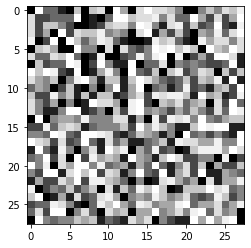

In [48]:
#show image
data = (train.T.values).reshape(-1, 785)
scale = 255 / data.max() 
data8 = np.array(data, dtype=np.uint8) # 8-bit image data

y = data[:, -1].astype(int).copy()
x = data8[:, :-1].reshape(-1, 28, 28)

import matplotlib.pyplot as plt
plt.close('all')
plt.imshow(x[20], cmap='Greys')
plt.show()

In [49]:
X_train = train.drop('label', axis = 1)
y_train = train['label']
X_test = test.drop('label', axis = 1)
y_test = test['label']

In [50]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
scaler = MinMaxScaler()
X_test = scaler.fit_transform(X_test)

In [51]:
accuracy_scoreـ = [] #for save accuracy of diffrent methos

<h1 align=center style="line-height:75%;font-family:vazir;color:#0099cc">
<font face="Arial" color="#0099cc">
Random Forest without PCA
</font>
</h1>

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier(n_jobs=-1)
rf.fit(X_train, y_train)
pr_rf = rf.predict(X_test)
print('Random Forest Accuracy without PCA: ', accuracy_score(y_test, pr_rf))
accuracy_scoreـ.append(('randomforest', accuracy_score(y_test, pr_rf)))

Random Forest Accuracy without PCA:  0.8846


In [56]:
pca_train= PCA()
pca_test = PCA()
X_train_pca = pca_train.fit_transform(X_train)
X_test_pca = pca_test.fit_transform(X_test)

In [57]:
px.area(
    x=range(1, len(train.columns)),
    y=np.cumsum(pca_train.explained_variance_ratio_),
    labels={"x": "# Components", "y": "Explained Variance"}
)

<hr>
<p dir=rtl style="direction: rtl;text-align: center;line-height:220%;font-family:vazir;font-size:medium">
<font face="vazir" size=4>
با توجه به اینکه تعداد بالای فیچر روی سرعت اجرای
مدل های یادگیری ماشین تاثیر زیادی میگذارید از 
<code>n_components=50</code>
چون بالای ۸۵٪ واریانس داده ها را توضیح می دهد استفاده می کنیم.
</p>
<hr>

In [58]:
pca_train= PCA(n_components=50)
pca_test = PCA(n_components=50)
X_train_pca = pca_train.fit_transform(X_train)
X_test_pca = pca_test.fit_transform(X_test)

<h1 align=center style="line-height:75%;font-family:vazir;color:#0099cc">
<font face="Arial" color="#0099cc">
Random Forest with PCA
</font>
</h1>

In [59]:
rf_pca = RandomForestClassifier(n_jobs=-1)
rf_pca.fit(X_train_pca, y_train)
rf_pca_predict = rf_pca.predict(X_test_pca)
print('Random Forest Accuracy with PCA: ', accuracy_score(y_test, rf_pca_predict))
accuracy_scoreـ.append(('randomforest + pca', accuracy_score(y_test, rf_pca_predict)))

Random Forest Accuracy with PCA:  0.6132


<h1 align=center style="line-height:75%;font-family:vazir;color:#0099cc">
<font face="Arial" color="#0099cc">
DecisionTree 
</font>
</h1>

In [60]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train_pca, y_train)
tree_predict = tree.predict(X_test_pca)
print('DecisionTree Accuracy with PCA: ', accuracy_score(y_test, tree_predict))
accuracy_scoreـ.append(('DecisionTree + pca', accuracy_score(y_test, tree_predict)))

DecisionTree Accuracy with PCA:  0.4427


<h1 align=center style="line-height:75%;font-family:vazir;color:#0099cc">
<font face="Arial" color="#0099cc">
XGBoot
</font>
</h1>

In [61]:
from xgboost import XGBClassifier
xgboot = XGBClassifier()
xgboot.fit(X_train_pca, y_train)
y_pred_xgboot = xgboot.predict(X_test_pca)
print('XGBoot Accuracy with PCA: ', accuracy_score(y_test, y_pred_xgboot))
accuracy_scoreـ.append(('XGBoot + pca', accuracy_score(y_test, y_pred_xgboot)))

XGBoot Accuracy with PCA:  0.5355


<h1 align=center style="line-height:75%;font-family:vazir;color:#0099cc">
<font face="Arial" color="#0099cc">
Bagging on Randomforest
</font>
</h1>

In [62]:
from sklearn.ensemble import BaggingClassifier
estimator_bagging = BaggingClassifier(base_estimator=RandomForestClassifier(),
                                     n_jobs=-1)

estimator_bagging.fit(X_train_pca, y_train)
y_pred_bagging = estimator_bagging.predict(X_test_pca)
print('bagging on randomforest Accuracy with PCA: ', accuracy_score(y_test, y_pred_bagging))
accuracy_scoreـ.append(('Bagging on randomforest + pca', accuracy_score(y_test, y_pred_bagging)))

bagging on randomforest Accuracy with PCA:  0.6445


<h1 align=center style="line-height:75%;font-family:vazir;color:#0099cc">
<font face="Arial" color="#0099cc">
Bagging on DecisionTree 
</font>
</h1>

In [63]:
estimator_bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                     n_jobs=-1)

estimator_bagging.fit(X_train_pca, y_train)
y_pred_bagging = estimator_bagging.predict(X_test_pca)
print('bagging on decisiontree with PCA: ', accuracy_score(y_test, y_pred_bagging))
accuracy_scoreـ.append(('Bagging on decisiontree + pca', accuracy_score(y_test, y_pred_bagging)))

bagging on decisiontree with PCA:  0.5701


<h1 align=center style="line-height:75%;font-family:vazir;color:#0099cc">
<font face="Arial" color="#0099cc">
SVM</font>
</h1>

In [64]:
from sklearn.svm import SVC
svc_ = SVC()
svc_.fit(X_train_pca, y_train)
y_pred_svc = svc_.predict(X_test_pca)
print('SVC Accuracy with PCA: ', accuracy_score(y_test, y_pred_svc))
accuracy_scoreـ.append(('SVC + pca', accuracy_score(y_test, y_pred_svc)))

SVC Accuracy with PCA:  0.5774


<h1 align=center style="line-height:75%;font-family:vazir;color:#0099cc">
<font face="Arial" color="#0099cc">
KNeighbors
</font>
</h1>

In [65]:
knn_default = KNeighborsClassifier()
knn_default.fit(X_train_pca, y_train)
y_pred_knn_default = knn_default.predict(X_test_pca)
print('knn_default Accuracy with PCA: ', accuracy_score(y_test, y_pred_knn_default))
accuracy_scoreـ.append(('knn_default + pca', accuracy_score(y_test, y_pred_knn_default)))

knn_default Accuracy with PCA:  0.5387


In [72]:
score_report = pd.DataFrame({'method': [i[0] for i in accuracy_scoreـ],
                             'Accuracy(%)': [i[1]*100 for i in accuracy_scoreـ]})
score_report.sort_values(by='Accuracy(%)', ascending=False).set_index('method')

Accuracy(%)
method                                    
randomforest                         88.46
Bagging on randomforest + pca        64.45
randomforest + pca                   61.32
SVC + pca                            57.74
Bagging on decisiontree + pca        57.01
knn_default + pca                    53.87
XGBoot + pca                         53.55
DecisionTree + pca                   44.27

<hr>
<p dir=rtl style="direction: rtl;text-align: center;line-height:220%;font-family:vazir;font-size:medium">
<font face="vazir" size=4>
متاسفانه به دلیل زیاد بودن فیچرها، اجرای سیستم برای
<code>tune</code>
کردن هایپرپارامترها بسیار وقت گیر شد که از کدها حذف شدند.
</p>
<hr>